<a href="https://colab.research.google.com/github/IlhamThrq/AI_TI-1B_2025/blob/main/PenilaianPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal Praktikum Tipe 2: Clustering (data_customer.csv)

## Pengolahan Data

In [ ]:
import pandas as pd

# Membaca dataset customer
data_customer = pd.read_csv('data_customer.csv')

# Menampilkan 5 baris pertama
print(data_customer.head())

# Menampilkan informasi dari data customer
print(data_customer.info())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   19            15             39
1           2   21            15             81
2           3   20            16              6
3           4   23            16             77
4           5   31            17             40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes
None


## 2. Pembersihan data

In [ ]:
# Mengecek apakah ada missing value pada data
print(data_customer.isnull().sum())

# Jika ada missing value, isi dengan mean untuk kolom numerik
for col in ['Age', 'AnnualIncome', 'SpendingScore']:
    if data_customer[col].isnull().sum() > 0:
        data_customer[col].fillna(data_customer[col].mean(), inplace=True)

# Fungsi untuk mendeteksi dan menghapus outlier dengan metode IQR
def remove_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Menghapus outlier pada kolom Age, AnnualIncome, dan SpendingScore
for col in ['Age', 'AnnualIncome', 'SpendingScore']:
    before = data_customer.shape[0]
    data_customer = remove_outlier_iqr(data_customer, col)
    after = data_customer.shape[0]
    print(f"Outlier dihapus pada kolom {col}: {before-after} baris dihapus.")

# Menampilkan data setelah pembersihan
print(data_customer.info())
print(data_customer.head())


CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64
Outlier dihapus pada kolom Age: 3 baris dihapus.
Outlier dihapus pada kolom AnnualIncome: 0 baris dihapus.
Outlier dihapus pada kolom SpendingScore: 0 baris dihapus.
<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     17 non-null     int64
 1   Age            17 non-null     int64
 2   AnnualIncome   17 non-null     int64
 3   SpendingScore  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0 bytes
None
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   19            15             39
1           2   21            15             81
2           3   20            16              6
3           4   23            16             77
4           5   31            17             40


## 3. Pemrosesan Data

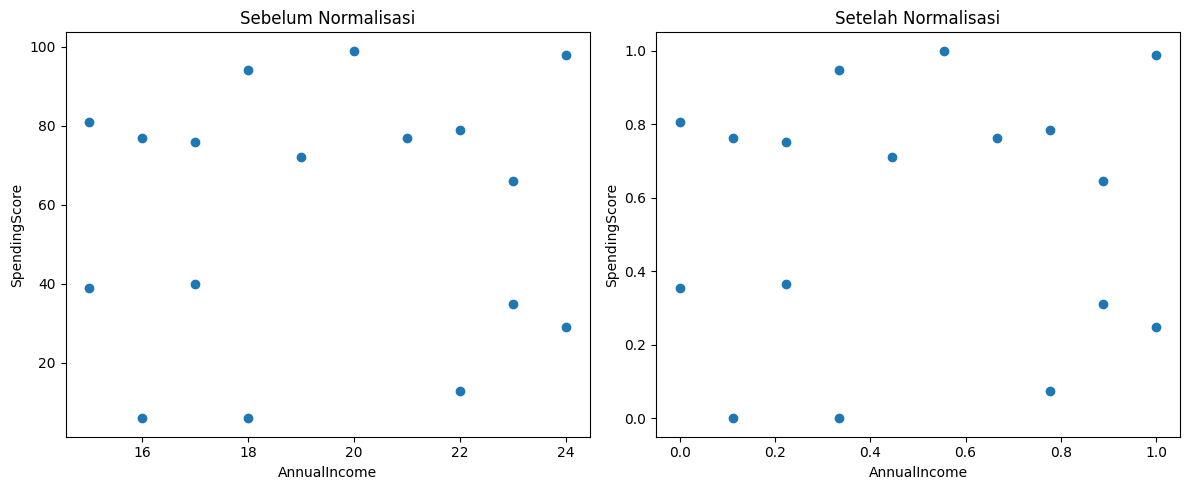

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Membuat salinan data untuk dinormalisasi
data_customer_norm = data_customer.copy()

# Mendefinisikan kolom yang akan dinormalisasi
features = ['Age', 'AnnualIncome', 'SpendingScore']

# Membuat objek scaler
scaler = MinMaxScaler()

# Melakukan normalisasi Min-Max pada fitur numerik
data_customer_norm[features] = scaler.fit_transform(data_customer[features])

# Scatter plot sebelum normalisasi
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(data_customer['AnnualIncome'], data_customer['SpendingScore'])
plt.title('Sebelum Normalisasi')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')

# Scatter plot setelah normalisasi
plt.subplot(1,2,2)
plt.scatter(data_customer_norm['AnnualIncome'], data_customer_norm['SpendingScore'])
plt.title('Setelah Normalisasi')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')

plt.tight_layout()
plt.show()


## 4. Clustering dengan K-Means

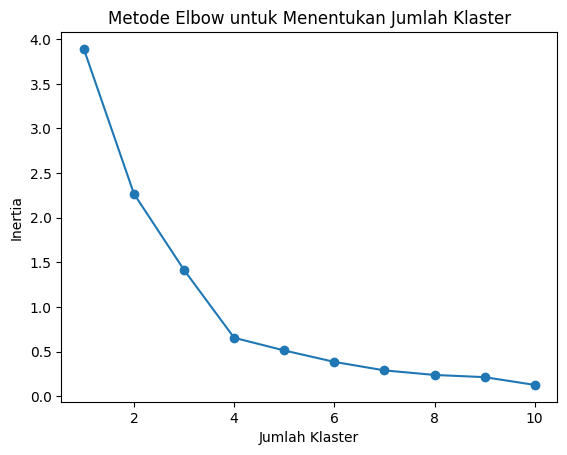

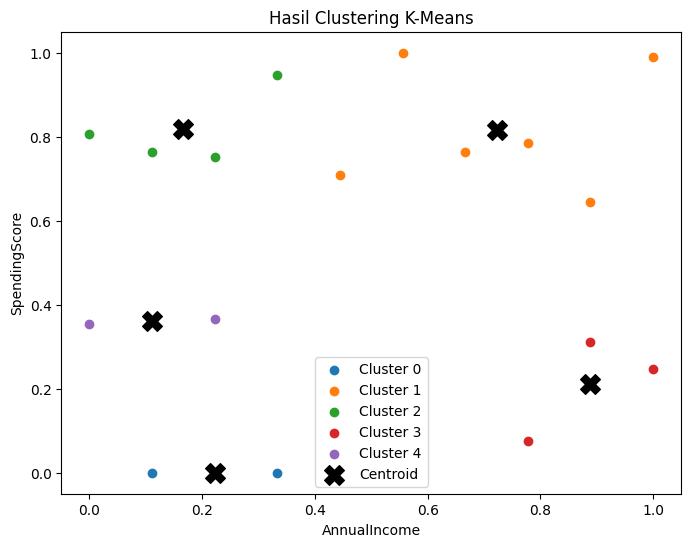

In [ ]:
from sklearn.cluster import KMeans

# Menyiapkan data untuk clustering (menggunakan fitur AnnualIncome dan SpendingScore yang sudah dinormalisasi)
X = data_customer_norm[['AnnualIncome', 'SpendingScore']]

# Menentukan jumlah klaster optimal dengan metode Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()

# Dari grafik elbow, tentukan jumlah klaster optimal, misal k = 5
k_optimal = 5  # Ganti sesuai hasil grafik Elbow kamu

# Membuat model K-Means dan melakukan clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data_customer_norm['Cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil clustering pada scatter plot
plt.figure(figsize=(8,6))
for i in range(k_optimal):
    cluster_data = data_customer_norm[data_customer_norm['Cluster'] == i]
    plt.scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'], label=f'Cluster {i}')

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroid'
)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('Hasil Clustering K-Means')
plt.legend()
plt.show()
